# AI prep workbook

## Reading in Parquet and CSV files

In [ ]:
import os
import pandas as pd
from scripts.csvtoparquet import csv_to_parquet_single_file

# Example usage
current_directory = os.getcwd()
csv_file_path = os.path.join(current_directory, 'input', 'train_labels.csv')
output_file_path = os.path.join(current_directory, 'input', 'full_labels.parquet')

chunksize = 100000
sample_rows = 150000


csv_to_parquet_single_file(csv_file_path, output_file_path, chunksize=chunksize, sample_rows=sample_rows)



In [ ]:
import os
import pandas as pd
from scripts.parquetreader import read_parquet_file 

current_directory = os.getcwd()

training = os.path.join(current_directory, 'input', 'full_data.parquet')
labels = os.path.join(current_directory, 'input', 'full_labels.parquet')

dftrain=read_parquet_file(training)

dflabels=read_parquet_file(labels)
dflabels.drop_duplicates(inplace=True)

print('training',dftrain.shape[0])
print(dftrain['D_64'].dtype)

print('labels',dftrain.shape[0])

In [ ]:
import pandas as pd
import os

# Assuming dftrain and dflabels are defined and available
# If possible, optimize data types in dftrain and dflabels before this operation

# Efficient merging by subsetting dflabels to only necessary columns before merge
result_df = pd.merge(dftrain, dflabels[['customer_ID', 'target']], on='customer_ID', how='inner')

# In-place operations for efficiency
result_df.drop(columns=['D_64','D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142'], inplace=True)
result_df.fillna(0, inplace=True)

# Prepare file path
current_directory = os.getcwd()
output_file_sampledparquet = os.path.join(current_directory, 'input', 'sample_trainingdata.parquet')

# Save to Parquet with optimization
result_df.to_parquet(output_file_sampledparquet, engine='pyarrow', compression='snappy')


In [ ]:
import pandas as pd
import os

current_directory = os.getcwd()
parquet_file_path = os.path.join(current_directory, 'input', 'sample_trainingdata.parquet')


# Read the Parquet file
dfmodelstep1 = pd.read_parquet(parquet_file_path)

# Now you can work with your DataFrame 'df'
print(dfmodelstep1.shape[0])
unique_customer_ids = dfmodelstep1['customer_ID'].nunique()
print(unique_customer_ids)

## Train/Testsplit and model run

Set random seed for reproducibility
Extract customer_ID separately if needed
Saving Customer_ID
Drop non-numeric columns and the target column from features
X variables
Target column
Labels
Split the dataset into training and test sets, along with customer_IDs if necessary
Data normalization
Reshape data for Transformer input
Create and compile the model with Transformer layer
Model summary to verify architecture


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 1, 180)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 180)    │      3,072 │ input_layer_14[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 1, 180)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 180)    │        360 │ dropout_29[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 180)       │          0 │ layer_normalizat… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 32)        │      5,792 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │         33 │ dense_28[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,257 (36.16 KB)

 Trainable params: 9,257 (36.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Train the model with early stopping
Epoch 1/5
9038/9038 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8666 - loss: 0.2901 - val_accuracy: 0.8749 - val_loss: 0.2741
Epoch 2/5
9038/9038 ━━━━━━━━━━━━━━━━━━━━ 8s 922us/step - accuracy: 0.8731 - loss: 0.2775 - val_accuracy: 0.8748 - val_loss: 0.2735
Epoch 3/5
9038/9038 ━━━━━━━━━━━━━━━━━━━━ 8s 853us/step - accuracy: 0.8739 - loss: 0.2760 - val_accuracy: 0.8755 - val_loss: 0.2726
Epoch 4/5
9038/9038 ━━━━━━━━━━━━━━━━━━━━ 8s 876us/step - accuracy: 0.8742 - loss: 0.2753 - val_accuracy: 0.8758 - val_loss: 0.2720
Epoch 5/5
9038/9038 ━━━━━━━━━━━━━━━━━━━━ 8s 857us/step - accuracy: 0.8746 - loss: 0.2749 - val_accuracy: 0.8760 - val_loss: 0.2718
Predict on the test set
11297/11297 ━━━━━━━━━━━━━━━━━━━━ 3s 256us/step

Calculate and print model accuracy on the test dataset
Model Accuracy on Test Dataset: 0.88
Visualization of training history


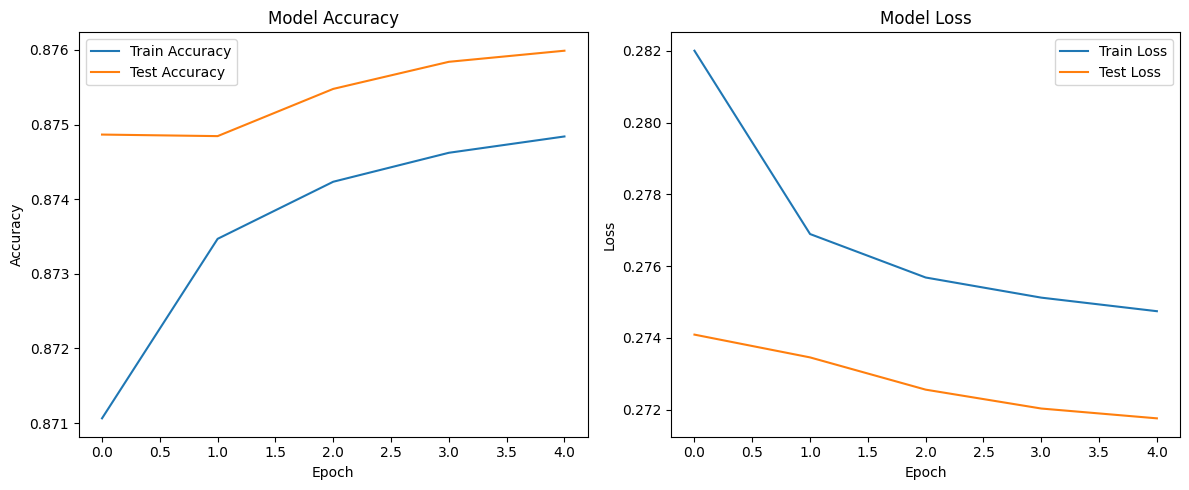

Calculate and display the confusion matrix


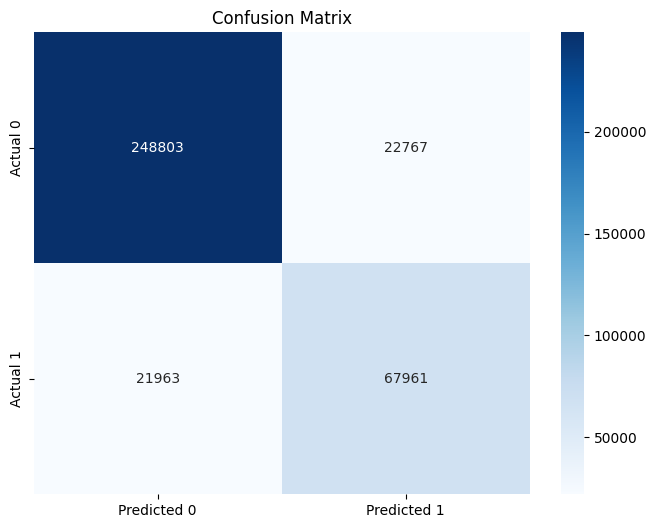

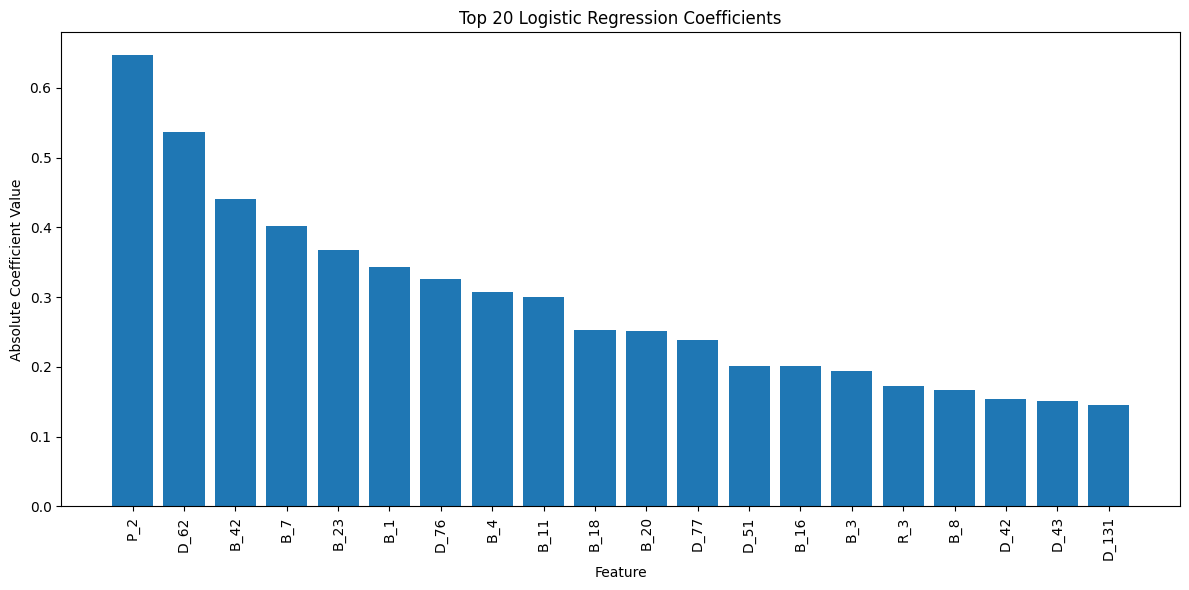

Create and save the predictions DataFrame with customer_IDs
Specify and ensure the output directory exists
Move the output file to the output directory
File saved to: /Users/danramirez/mbs-transformers/output/predictions.csv


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models,callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
from joblib import Parallel, delayed
import shap

print('Set random seed for reproducibility')
tf.random.set_seed(42)
np.random.seed(42)

def create_model_with_transformer(input_shape):
    inputs = layers.Input(shape=input_shape)
    transformer_layer = layers.MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    transformer_layer = layers.Dropout(0.1)(transformer_layer)
    transformer_layer = layers.LayerNormalization(epsilon=1e-6)(transformer_layer)
    transformer_output = layers.Flatten()(transformer_layer)
    x = layers.Dense(32, activation='relu')(transformer_output)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # EarlyStopping callback
    early_stopping = callbacks.EarlyStopping(
        monitor='accuracy',  # Monitor model's accuracy
        patience=4,  # Number of epochs with no improvement after which training will be stopped
        verbose=2,  # To print the message when stopped
        mode='max',  # Mode 'max' because we want to monitor accuracy for maximization
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
    )
    
    return model, early_stopping

print('Extract customer_ID separately if needed')
customer_IDs = dfmodelstep1['customer_ID']
print('Saving Customer_ID')

print('Drop non-numeric columns and the target column from features')
X = dfmodelstep1.select_dtypes(include=['number']).drop(columns=['target'])
feature_names = X.columns.tolist()
print('X variables')

print('Target column')
y = dfmodelstep1['target']
print('Labels')

print('Split the dataset into training and test sets, along with customer_IDs if necessary')
X_train, X_test, y_train, y_test, customer_IDs_train, customer_IDs_test = train_test_split(
    X, y, customer_IDs, test_size=0.2, random_state=42)

print('Data normalization')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Reshape data for Transformer input')
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print('Create and compile the model with Transformer layer')
model,early_stopping_callback = create_model_with_transformer(input_shape=(X_train.shape[1], X_train.shape[2]))

print('Model summary to verify architecture')
print(model.summary())

print('Train the model with early stopping')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.2, callbacks=[early_stopping])

print('Predict on the test set')
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
print('')
print('Calculate and print model accuracy on the test dataset')
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Dataset: {test_accuracy:.2f}")

print('Visualization of training history')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

print('Calculate and display the confusion matrix')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your original DataFrame before splitting and normalizing
feature_names = X.columns.tolist()

# Flatten the 3D training and test data to 2D for LogisticRegression
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)

# Get the coefficients of the logistic regression model
coefficients = np.abs(log_reg.coef_[0])

# Sort the features by the absolute value of their coefficients
sorted_indices = np.argsort(coefficients)[::-1]

# Plot the top 20 features based on their importance
plt.figure(figsize=(12, 6))
top_indices = sorted_indices[:20]
plt.bar(range(len(top_indices)), coefficients[top_indices], align='center')
plt.xticks(range(len(top_indices)), labels=np.array(feature_names)[top_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Top 20 Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

print('Create and save the predictions DataFrame with customer_IDs')
results_df = pd.DataFrame({'customer_ID': customer_IDs_test, 'y_test': y_test, 'y_pred': y_pred})
output_filename = 'predictions.csv'
results_df.to_csv(output_filename, index=False)

print('Specify and ensure the output directory exists')
current_directory = os.getcwd()
output_directory = os.path.join(current_directory, 'output')
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

print('Move the output file to the output directory')
shutil.move(output_filename, os.path.join(output_directory, output_filename))
print(f'File saved to: {os.path.join(output_directory, output_filename)}')


# Upload parquet to Blob Storage

In [ ]:
from azure.storage.blob import BlobServiceClient, BlobClient,ContainerClient 
import os
from dotenv import load_dotenv
load_dotenv()
connection_str = os.getenv('connection_str')


# Azure storage account detail
container_name = 'trainingdata'

# File to upload
current_directory = os.getcwd()
parquet_file_path = os.path.join(current_directory, 'input', 'sample_trainingdata.parquet')

# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(connection_str)

# Create the container client
container_client = blob_service_client.get_container_client(container_name)

# Create a blob client using the local file name as the name for the blob
blob_client = blob_service_client.get_blob_client(container=container_name, blob=os.path.basename(parquet_file_path))

print(f"Uploading to Azure Storage as blob:\n\t {os.path.basename(parquet_file_path)}")

# Upload the created file
with open(parquet_file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

print("Upload completed successfully")


# Reading Parquet File

In [ ]:
import pandas as pd
from azure.storage.blob import BlobServiceClient
from io import BytesIO
from dotenv import load_dotenv
load_dotenv()
connection_str = os.getenv('connection_str')

# Initialize a BlobServiceClient
blob_service_client = BlobServiceClient.from_connection_string(connection_str)

# Specify your container and the name for the file in the container
container_name = 'trainingdata'
blob_name = 'new_train_data.parquet'

def read_parquet_file_from_blob(connection_str, container_name, blob_name):

    blob_service_client = BlobServiceClient.from_connection_string(connection_str)
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
    
    stream = BytesIO()
    blob_client.download_blob().download_to_stream(stream)
    stream.seek(0)  # Go to the start of the stream
    df = pd.read_parquet(stream)
    
    return df

